<a href="https://www.kaggle.com/code/pranayrishith16/fashion-mnist-simple-cnn-0-91?scriptVersionId=134722535" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
random.set_seed(44)
fashion = ['T-shirt/top',' Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [4]:
data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0        30        43   
3           0  ...         3         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
59995       0  ...         0         0         0         0         0   
59996       0  ...        73         0         0         0         0   
59997       0  ...       160       162       163       135        94   
59998       0  ...         0         0         0         0         0   
59999       0  ...         0         0         0         0         0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             1         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
59995         0         0         0         0         0  
59996         0         0         0         0         0  
59997         0         0         0         0         0  
59998         0         0         0         0         0  
59999         0         0         0         0         0  

[60000 rows x 785 columns]

Text(0.5, 1.0, 'T-shirt/top')

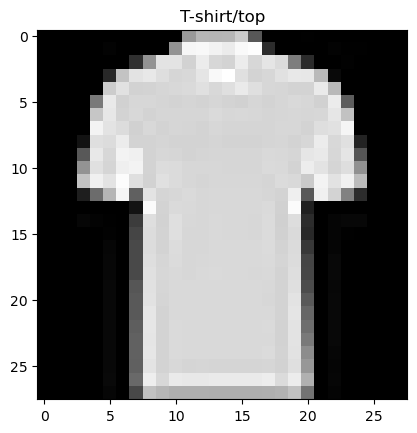

In [5]:
plt.imshow(data.iloc[12560][1:].values.reshape(28,28),cmap='gray')
plt.title(fashion[data.iloc[12560][0]])

In [6]:
y = data['label']
X = data.drop('label',axis=1)
X.shape,y.shape

((60000, 784), (60000,))

In [7]:
X = X/255.
X = X.values.reshape(-1,28,28,1)
y = to_categorical(y,num_classes=10)

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

In [9]:
inputs = Input(shape=(28,28,1))

x = Conv2D(8,(3,3),padding='same',activation='relu')(inputs)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Conv2D(64,(3,3),activation='relu')(x)
x = MaxPool2D()(x)
x = Dropout(0.1)(x)

x = Flatten()(x)
x = Dense(128,activation='relu')(x)
x = Dense(10,activation='softmax')(x)

model = Model(inputs=inputs,outputs=x)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        4672      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                         

In [10]:
dataAug = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# history = model.fit(X_train,y = y_train, epochs=15, validation_data=(X_test,y_test))
history = model.fit(dataAug.flow(X_train,y_train),epochs=40,validation_data=(X_test,y_test))

Epoch 1/40
1313/1313 [==============================] - 25s 18ms/step - loss: 1.1085 - accuracy: 0.5920 - val_loss: 116.3034 - val_accuracy: 0.6252
Epoch 2/40
1313/1313 [==============================] - 26s 19ms/step - loss: 0.7287 - accuracy: 0.7259 - val_loss: 112.6030 - val_accuracy: 0.6263
Epoch 3/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.6471 - accuracy: 0.7563 - val_loss: 109.3853 - val_accuracy: 0.6311
Epoch 4/40
1313/1313 [==============================] - 25s 19ms/step - loss: 0.6002 - accuracy: 0.7731 - val_loss: 98.8704 - val_accuracy: 0.6464
Epoch 5/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.5674 - accuracy: 0.7853 - val_loss: 89.1117 - val_accuracy: 0.6669
Epoch 6/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.5486 - accuracy: 0.7951 - val_loss: 119.9693 - val_accuracy: 0.6227
Epoch 7/40
1313/1313 [==============================] - 23s 17ms/step - loss: 0.5332 - accuracy: 0.7990 - val_loss

In [ ]:
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test.head()

In [ ]:
ytest = test['label']
xtest = test.drop('label',axis=1)
xtest = xtest/255.
xtest = xtest.values.reshape(-1,28,28,1)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
y_pred = []
for i in range(len(ypred)):
    y_pred.append(ypred[i].argmax())

In [ ]:
plt.imshow(xtest[563],cmap='gray')
plt.title('actual:{}  predicted:{}'.format(fashion[ytest[563]],fashion[y_pred[563]]))

In [ ]:
print(accuracy_score(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='.0f',cmap='Blues',xticklabels=fashion,yticklabels=fashion)